# 🏡 House Price Prediction - EDA & Linear Regression Model
A complete walkthrough of exploratory data analysis and building a linear regression model.

## 📦 Step 1: Import Libraries and Load Dataset

In [14]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (California Housing - regression problem)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


The dataset returned by fetch_california_housing() contains a collection of features (columns) about California districts. 

These columns are:

MedInc: Median income in the district (in tens of thousands of dollars)
HouseAge: Median age of the houses
AveRooms: Average number of rooms per household
AveBedrms: Average number of bedrooms per household
Population: Population of the district
AveOccup: Average occupancy (number of people per household)
Latitude: Latitude coordinate of the district
Longitude: Longitude coordinate of the district
The target variable (data.target) corresponds to the median house value (in units of $100,000). These features are used in regression tasks to predict the median house price in California districts.



## 🧾 Step 2: Exploratory Data Analysis (EDA)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [16]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [17]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### 🔍 Correlation Matrix

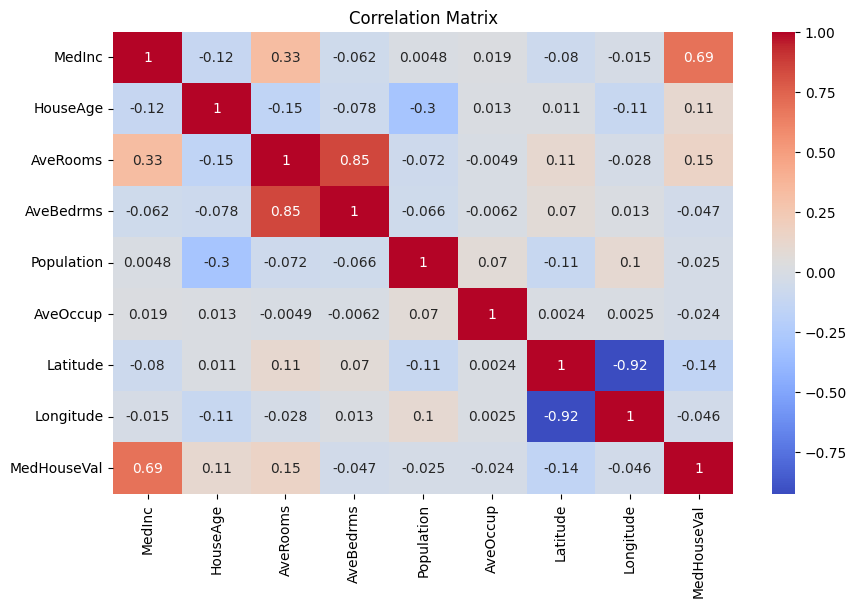

In [18]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 📊 Pairplot of Top Features

In [22]:
top_features = df.corr()['MedHouseVal'].abs().sort_values(ascending=False).head().index.tolist()
top_features

['MedHouseVal', 'MedInc', 'AveRooms', 'Latitude', 'HouseAge']

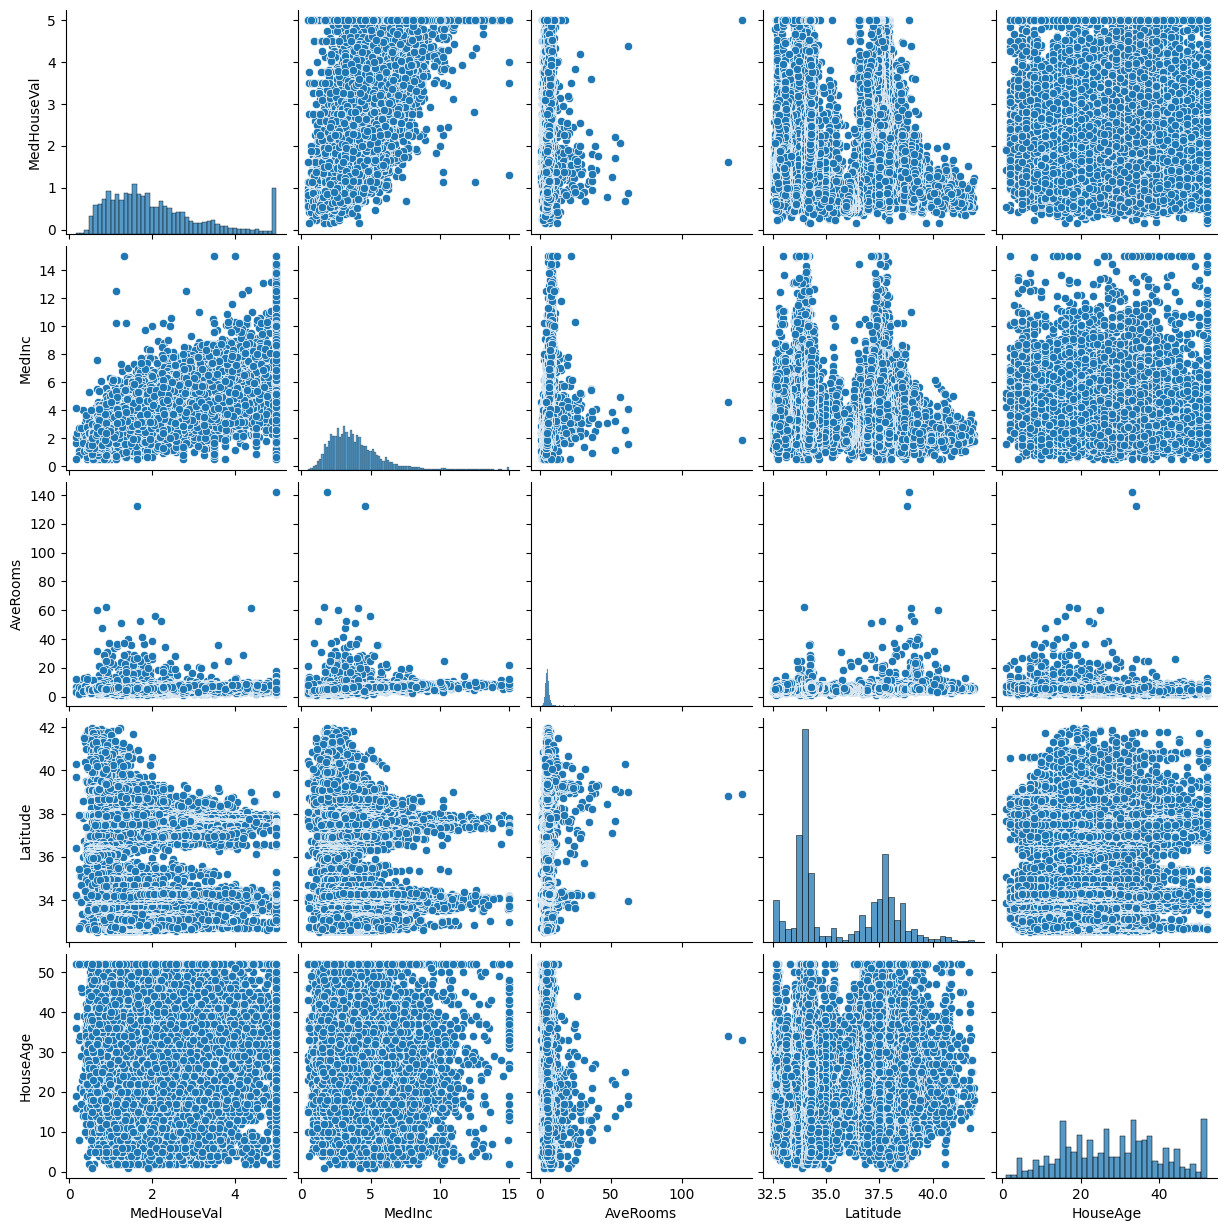

In [23]:

top_features = df.corr()['MedHouseVal'].abs().sort_values(ascending=False).head(5).index.tolist()
sns.pairplot(df[top_features])


## 🧹 Step 3: Data Preparation

In [25]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [26]:
X = df.drop('MedHouseVal', axis=1)
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
100 - 70 , 30

In [27]:

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
X.shape , y.shape

((20640, 8), (20640,))

In [ ]:
X_train.shape , y_train.shape

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [ ]:
16 -xyz , 4k - xyz

In [ ]:
20 k - 16 K - train - 4 K - test

Cross validation - 5 folds - 4 k, 4k, 4k, 4k, 4k - mse 1 
                             4k, 4 k, 4k, 4k, 4k - mse 2
                            4k, 4k, 4 k, 4k, 4k - mse 3 
                            4k, 4k, 4k, 4 k, 4k - mse 4
                            4k, 4k, 4k, 4k, 4 k - mse 5  

20k 


1-5 mse 

mean of all     





## 🧠 Step 4: Model Building - Linear Regression

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [33]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [ ]:
y = w1*X1 + w2*X2 + .... + w8*X8 + b
y = wx + b

In [32]:
model.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [34]:
model.intercept_

-37.023277706064235

In [40]:

y_pred = model.predict(X_test)


In [36]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

## 📈 Step 5: Model Evaluation

In [41]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.56
R² Score: 0.58


### 🔎 Coefficients & Feature Impact

In [42]:

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coeff_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
3,AveBedrms,0.783145
0,MedInc,0.448675
1,HouseAge,0.009724
4,Population,-0.000002
5,AveOccup,-0.003526
2,AveRooms,-0.123323
6,Latitude,-0.419792
7,Longitude,-0.433708


In [43]:
# Create a human-readable equation
equation = f"y = {model.intercept_:.2f}"
for coef, feature in zip(model.coef_, X.columns):
    equation += f" + ({coef:.2f} * {feature})"
print(equation)

y = -37.02 + (0.45 * MedInc) + (0.01 * HouseAge) + (-0.12 * AveRooms) + (0.78 * AveBedrms) + (-0.00 * Population) + (-0.00 * AveOccup) + (-0.42 * Latitude) + (-0.43 * Longitude)


## ✅ Summary
- Performed EDA and correlation analysis
- Built a linear regression model
- Evaluated it using MSE and R² Score
- Interpreted feature importance via coefficients

## 🔧 Step 6: Optional - Hyperparameter Tuning with Cross-Validation

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression with cross-validation
model = LinearRegression()
liner_score = cross_val_score(model, X, y, scoring='r2', cv=5)
print(f"Ridge CV R² Scores: {liner_score}")
print(f"Mean R² (Ridge): {liner_score.mean():.4f}")

Ridge CV R² Scores: [0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
Mean R² (Ridge): 0.5530


In [49]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression with cross-validation
ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X, y, scoring='r2', cv=5)
print(f"Ridge CV R² Scores: {ridge_scores}")
print(f"Mean R² (Ridge): {ridge_scores.mean():.4f}")

# Lasso Regression with cross-validation
lasso = Lasso(alpha=0.1)
lasso_scores = cross_val_score(lasso, X, y, scoring='r2', cv=5)
print(f"Lasso CV R² Scores: {lasso_scores}")
print(f"Mean R² (Lasso): {lasso_scores.mean():.4f}")


Ridge CV R² Scores: [0.54878594 0.46817341 0.55078466 0.53693584 0.66053068]
Mean R² (Ridge): 0.5530
Lasso CV R² Scores: [0.51250667 0.42928553 0.51135698 0.38784761 0.51998859]
Mean R² (Lasso): 0.4722


# 📊 Ridge vs. Lasso Regression – Comparison Chart

| Feature                    | Ridge Regression (L2)                                                   | Lasso Regression (L1)                                                    |
|----------------------------|--------------------------------------------------------------------------|---------------------------------------------------------------------------|
| 🔧 Regularization Type     | L2 Regularization                                                        | L1 Regularization                                                         |
| 🧮 Mathematical Eq.| $\text{Loss} = \text{MSE}+\lambda \sum_{i=1}^{n} w_i^2$| $\text{Loss} = \text{MSE}+\lambda\sum_{i=1}^{n}|w_i|$          |
| 📉 Penalty Term            | Sum of **squares** of coefficients                                       | Sum of **absolute values** of coefficients                               |
| ❌ Coefficients Shrinking  | Shrinks coefficients towards 0 (but not exactly 0)                       | Can shrink coefficients to **exactly 0** (feature selection)              |
| 🧮 Feature Selection        | ❌ Not ideal                                                              | ✅ Performs automatic feature selection                                   |
| 📊 Use Case                | When all features may be useful but need regularization                  | When you expect **only a few** features are relevant                      |
| 🔄 Handles Multicollinearity | ✅ Yes                                                                | ⚠️ Can be unstable with highly correlated variables                        |
| 🧠 Model Interpretation     | Coefficients are **retained**                                            | Model is **simpler** with fewer features                                  |
| 📦 scikit-learn Example    | `Ridge(alpha=1.0)`                                                       | `Lasso(alpha=0.1)`                                                        |

---

## ✅ Summary

- **Ridge** is great when you have multicollinearity or many features to keep.
- **Lasso** is great when you want to eliminate irrelevant features.
- Combine both with **Elastic Net** for a balanced approach.

📘 Read more in [scikit-learn Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)



$\text{Loss} = \text{MSE}+\lambda\sum_{i=1}^{n}|w_i|$

## 📊 Step 7: Model Comparison Visualization

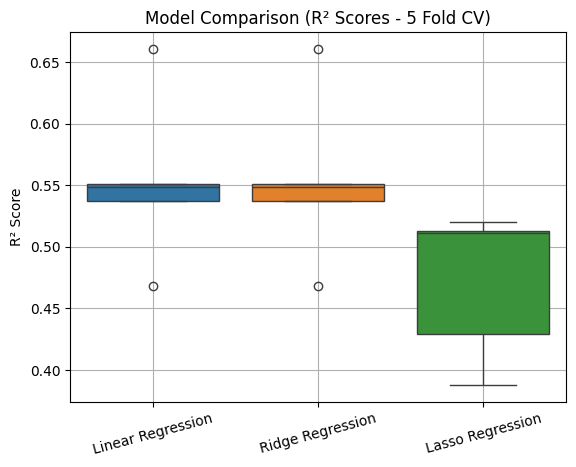

In [50]:

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    results[name] = scores

# Convert to DataFrame for visualization
results_df = pd.DataFrame(results)
sns.boxplot(data=results_df)
plt.title("Model Comparison (R² Scores - 5 Fold CV)")
plt.ylabel("R² Score")
plt.xticks(rotation=15)
plt.grid(True)
plt.show()
